<a href="https://colab.research.google.com/github/cabb1808/miniproyecto1/blob/main/MiniProyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción a la Clasificación - MiniProyecto 2
Tratamiento de Señales III

Facultad de Ingeniería

Universidad de Antioquia 
Hernán F. García PhD 
2023-1


**Autores:**

* Carlos Andres Burbano Bedoya
* Juan David Orozco Otalvaro

Un clasificador lo que realiza es a partir de una base de datos o de una observación ${\bf{x}}_n$ realiza una predicción de una etiqueta discreta $t_n$,

Para nosotros en el caso de la base de datos de sismos, tenemos $3$ tipos diferentes de clases

- 1 - Local
- 2 - Regional
- 3 - Telesismo

Ejemplo base de datos IRS

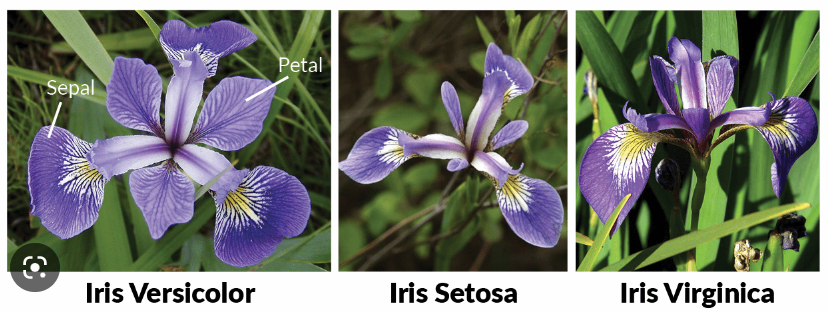

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
from scipy import signal
from ipywidgets import interact
import scipy 
from scipy.stats import entropy
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler



In [ ]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget 'https://raw.githubusercontent.com/cabb1808/miniproyecto1/main/dfMinip1.csv' -O 'dfMinip1.csv'

--2023-05-07 22:51:08--  https://raw.githubusercontent.com/cabb1808/miniproyecto1/main/dfMinip1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71028 (69K) [text/plain]
Saving to: ‘dfMinip1.csv’

dfMinip1.csv        100%[===================>]  69.36K  --.-KB/s    in 0.002s  

2023-05-07 22:51:08 (44.4 MB/s) - ‘dfMinip1.csv’ saved [71028/71028]



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np

data = pd.read_csv('dfMinip1.csv') # Cargamos el dataframe.
X=data.values[:,:-1]
y=data.Type
features=data.axes[1][:-1]
target_name=['Locales','Regionales','Telesismo']


Existen $50$ observaciones por cada clase

En este caso tenemos 50 observaciones de cada uno:

1 - Local

2 - Regional

3 - Telesismo

El conjunto de datos se divide en 3 clases y hay un total de 150 observaciones en el conjunto de datos, entonces cada clase tendría 50 observaciones.

Es importante tener un conjunto de datos equilibrado, es decir, con una cantidad similar de observaciones por clase, para evitar un sesgo en el modelo y garantizar una precisión y rendimiento óptimos. En este caso, cada clase tiene una cantidad igual de observaciones, lo que es una buena práctica.

In [ ]:
df = pd.DataFrame(X,columns = features)
df['clase'] = y
df


,energy,max_power,max_power_freq,mean_spectrum,var_spectrum,max_spectrum,min_spectrum,entropy,no zero crossing,no mean crossings,n5,n25,n75,n95,median,mean,std,var,rms,clase
0,2.113502,0.018324,0.492188,0.0005,0.000001,0.020338,0.0,8.54091,3972.0,3972.0,-0.025268,-0.009998,0.009426,0.026423,-0.000225,0.000001,0.020317,0.000413,0.013369,Locales
1,1.828433,0.034444,0.238281,0.000489,0.000001,0.011035,0.0,8.540639,2461.0,2461.0,-0.028201,-0.014795,0.014411,0.030784,-0.000633,-0.000002,0.018898,0.000357,0.015646,Locales
2,0.830401,0.002888,0.082031,0.000395,0.0,0.00403,0.0,8.540639,1234.0,1234.0,-0.017013,-0.008486,0.00715,0.022976,-0.001628,0.000001,0.012735,0.000162,0.00976,Locales
3,1.218146,0.006005,0.492188,0.000421,0.000001,0.012718,0.0,8.489616,3721.0,3721.0,-0.023479,-0.009376,0.009291,0.023708,-0.000008,0.0,0.015825,0.00025,0.011711,Locales
4,0.711375,0.002647,0.164062,0.000375,0.0,0.004974,0.0,8.489331,2653.0,2649.0,-0.019461,-0.007841,0.007628,0.019379,0.000214,0.000002,0.012094,0.000146,0.009436,Locales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.11246,0.000103,0.132812,0.000097,0.0,0.001981,0.0,9.681436,6877.0,6865.0,-0.004295,-0.001619,0.001619,0.004084,0.00007,0.0,0.002641,0.000007,0.002014,Telesismo
185,0.089213,0.000044,0.46875,0.000079,0.0,0.001227,0.0,9.683413,12807.0,12807.0,-0.00374,-0.001457,0.001457,0.003639,0.000006,0.0,0.002352,0.000006,0.001799,Telesismo
186,6.279756,0.014259,0.019531,0.000245,0.000001,0.024244,0.0,10.20172,3241.0,3241.0,-0.022411,-0.004958,0.005098,0.02187,0.000079,-0.0,0.015212,0.000231,0.009127,Telesismo
187,0.220868,0.000079,0.128906,0.000107,0.0,0.001534,0.0,10.200353,11335.0,11339.0,-0.004662,-0.001865,0.001865,0.00459,0.000072,0.0,0.002853,0.000008,0.002244,Telesismo


In [ ]:
le=LabelEncoder()
y=le.fit_transform(y)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'label']


<Figure size 640x480 with 0 Axes>

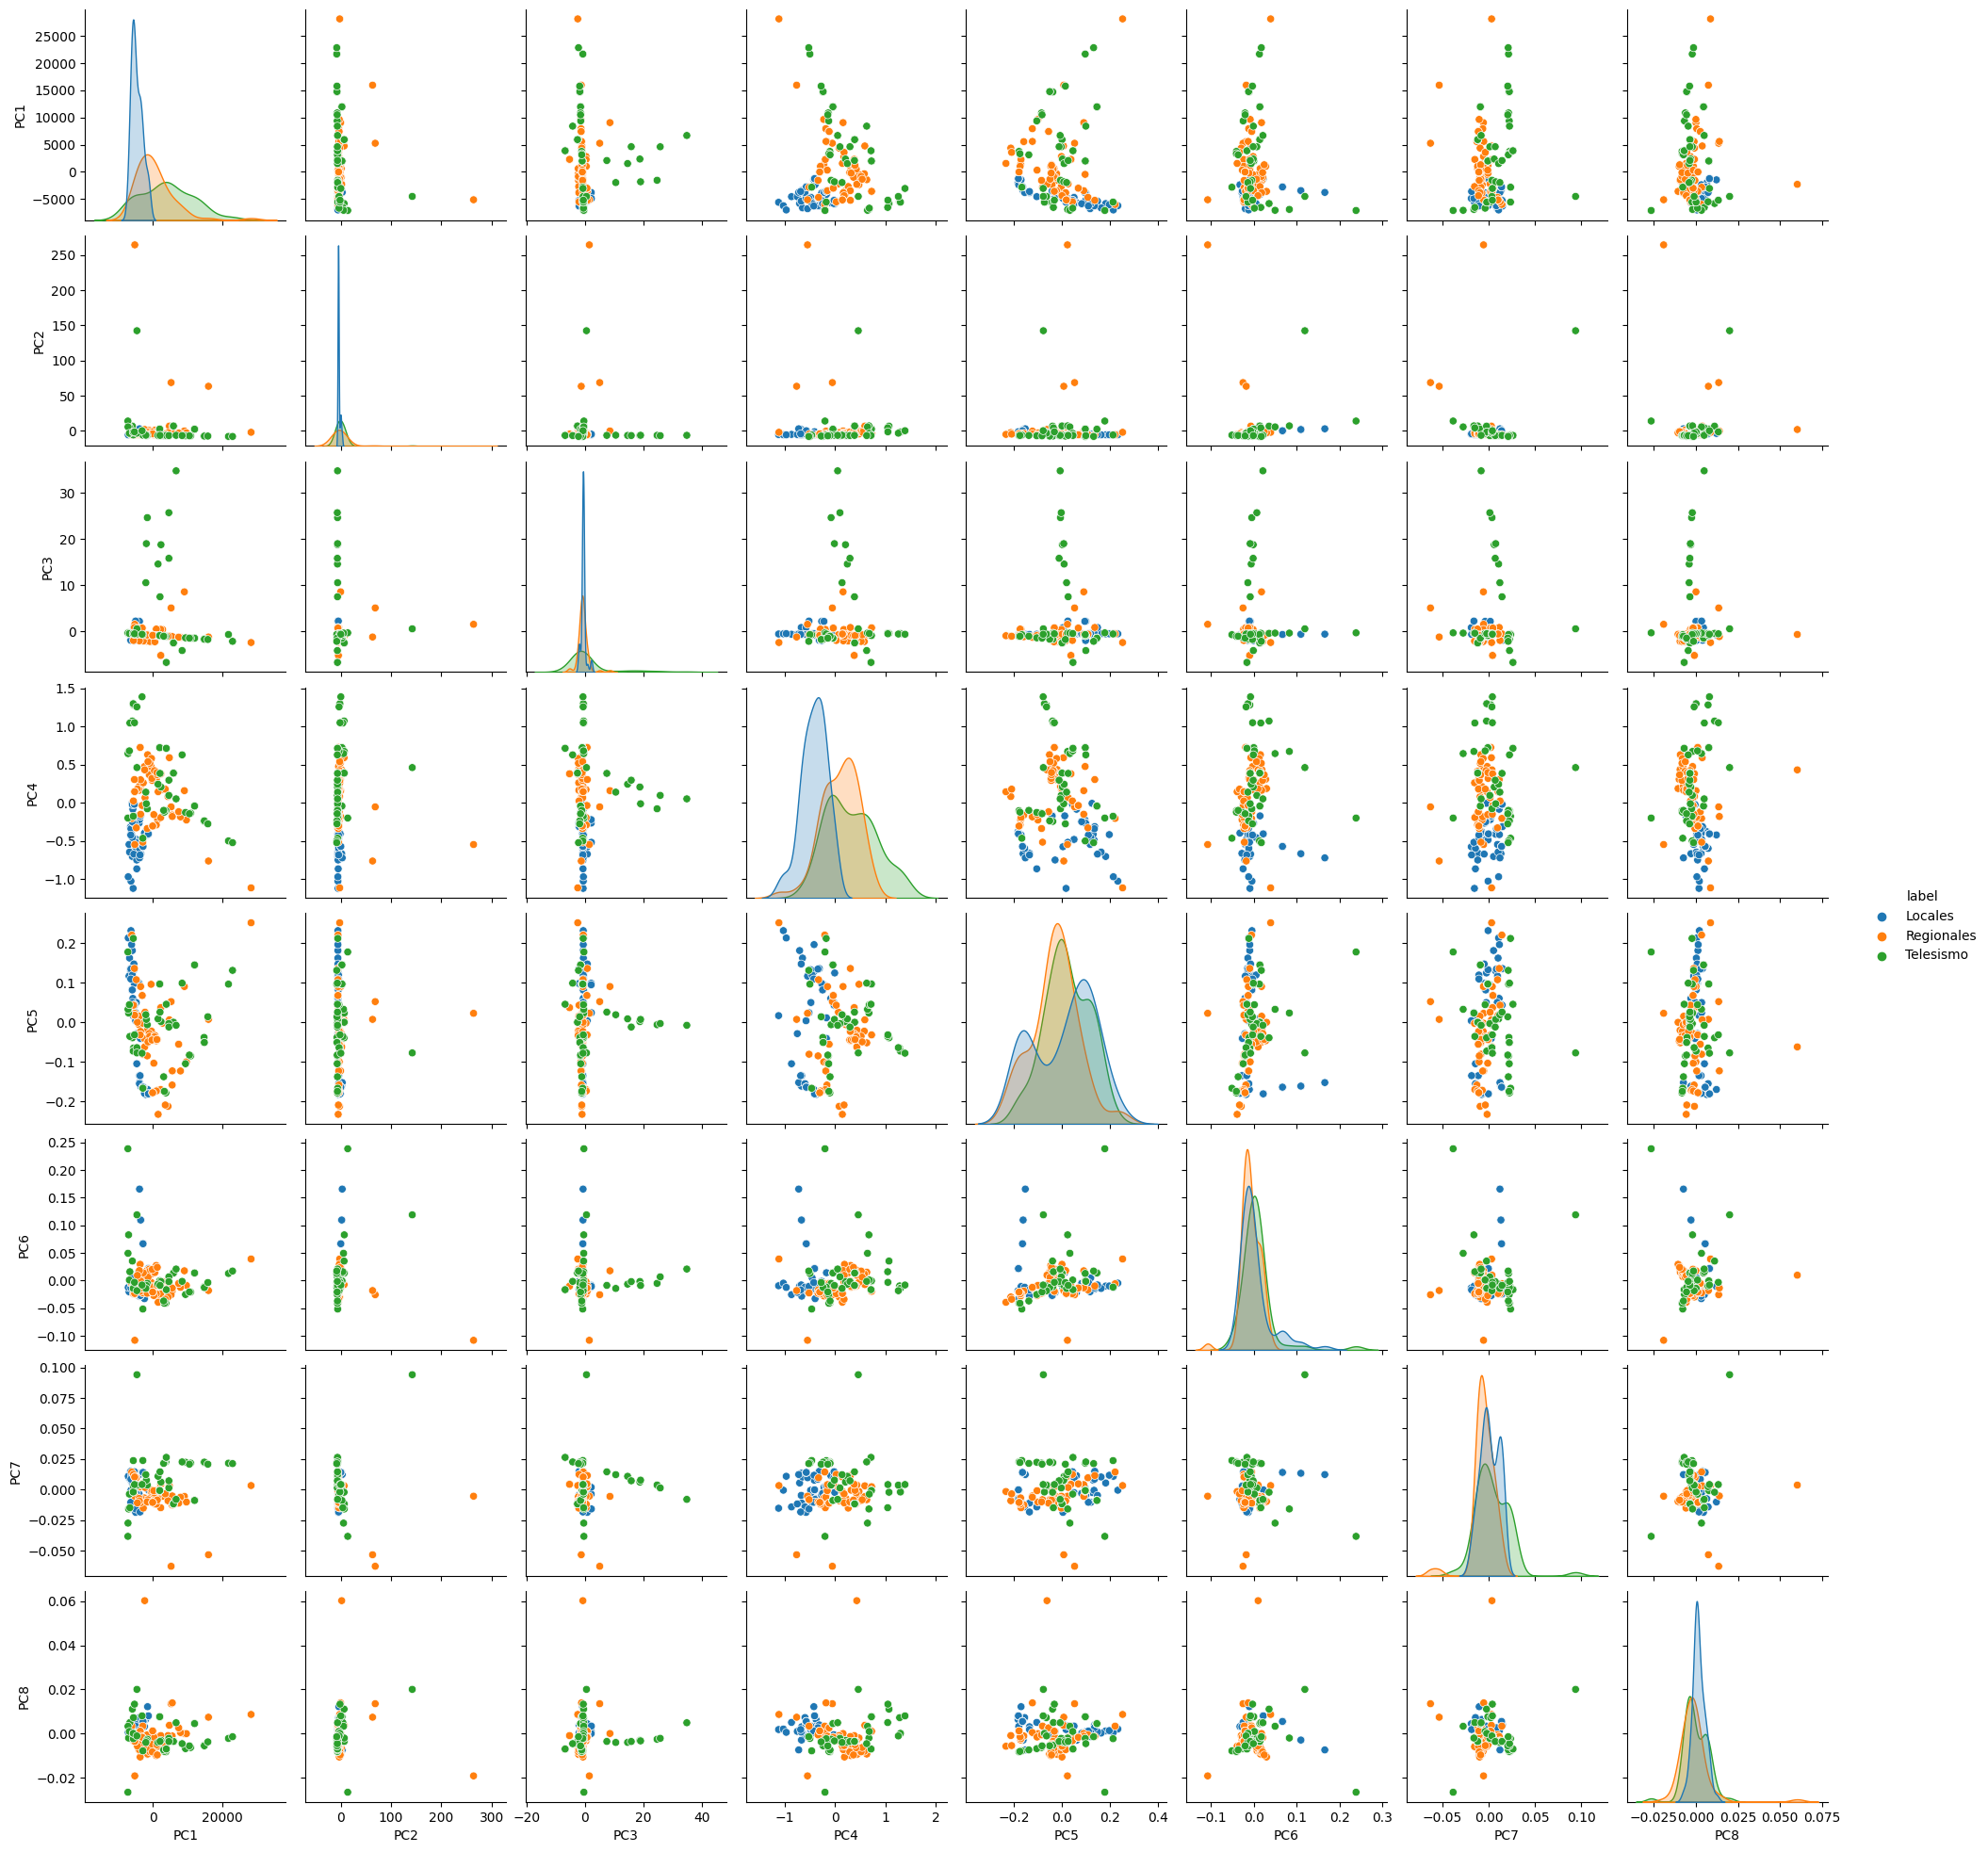

In [ ]:
# def PCAplot(n):

pca = PCA(n_components=8)

Xpca=pca.fit_transform(X) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)

Xlatent=pca.transform(X)  #Transformamos los datos al espacio latente

column_names=['PC{}'.format(i+1) for i in range(8)]
column_names.append('label')

print(column_names)
df_latent=pd.DataFrame(np.column_stack((Xpca,data.Type)),columns=column_names)

df_latent['label']=data.Type
plt.clf()
sns.pairplot(df_latent,hue='label')



Este fragmento de código primero crea una instancia de la clase PCA del paquete sklearn.decomposition y se fija el número de componentes principales (n_components) en 8.

Luego, se utiliza el método fit_transform del objeto pca para ajustar el modelo PCA a los datos de entrada X y transformar los datos en un nuevo espacio de características que consiste en las ocho componentes principales seleccionadas. Los datos transformados se almacenan en la variable Xpca.

El método transform del objeto pca se utiliza para transformar los datos originales X en el espacio de características seleccionado. Los datos transformados se almacenan en la variable Xlatent.

A continuación, se crea una lista de nombres de columna para el DataFrame df_latent, que consiste en las ocho componentes principales ('PC1', 'PC2',...,'PC8') y la etiqueta de clase ('label').

Luego, se crea un nuevo DataFrame df_latent utilizando la función pd.DataFrame, con los datos transformados Xpca y las etiquetas de clase originales data.Type. El DataFrame resultante tiene las columnas correspondientes a las componentes principales y a la etiqueta de clase.

Finalmente, se utiliza la biblioteca seaborn para trazar un pairplot de los datos transformados df_latent, donde cada par de componentes principales se traza en un diagrama de dispersión separado, y los puntos se codifican por color según su etiqueta de clase. Este gráfico se utiliza para explorar la estructura de los datos en el espacio de características seleccionado.




# **Análisis de imágenes**

 En general los tres histogramas correspondientes a cada clase de observaciones se superponen en la gráfica, y se codifican por color según la etiqueta de clase (Locales, Regionales o Telesismo).

* La gráfica fila 1 columna 

La gráfica muestra que hay una clara separación entre las tres clases de observaciones en el espacio de características seleccionado. En particular, las observaciones de la clase Telesismo parecen estar bien separadas de las otras dos clases, mientras que las observaciones de las clases Locales y Regionales se superponen más en el espacio de características seleccionado. Además, se puede observar una cierta estructura en forma de arco en la distribución de las observaciones de la clase Locales en el diagrama, lo que sugiere que hay una cierta correlación entre las primeras dos componentes principales para esta clase de observaciones.


* La gráfica fila 2 columna 2

La gráfica muestra que las observaciones de las tres clases tienen distribuciones diferentes en la segunda componente principal (PC2). En particular, las observaciones de la clase Telesismo tienen valores más altos de PC2 en general, mientras que las observaciones de las clases Locales y Regionales tienen valores más bajos de PC2. Además, las observaciones de las clases Locales y Regionales parecen tener distribuciones similares en PC2, mientras que las observaciones de la clase Telesismo tienen una distribución más sesgada hacia valores más altos de PC2.


* La gráfica fila 3 columna 3

La gráfica muestra que las observaciones de las tres clases tienen distribuciones diferentes en la tercera componente principal (PC3). En particular, las observaciones de las clases Locales y Regionales tienen valores más altos de PC3 en general, mientras que las observaciones de la clase Telesismo tienen valores más bajos de PC3. Además, las observaciones de las clases Locales y Regionales parecen tener distribuciones similares en PC3, mientras que las observaciones de la clase Telesismo tienen una distribución más sesgada hacia valores más bajos de PC3.


* La gráfica fila 4 columna 4

La gráfica muestra que las observaciones de las tres clases tienen distribuciones diferentes en la cuarta componente principal (PC4). En particular, las observaciones de las clases Locales tienen valores más bajos de PC4 en general, mientras que las observaciones de las clases Regionales y Telesismo tienen valores más altos de PC4. Además, las observaciones de las clases Regionales y Telesismo parecen tener distribuciones similares en PC4, mientras que las observaciones de la clase Locales tienen una distribución más sesgada hacia valores más bajos de PC4.

* La gráfica fila 5 columna 5

La gráfica muestra que las observaciones de las tres clases tienen distribuciones diferentes en la quinta componente principal (PC5). En particular, las observaciones de las clases Locales tienen valores más bajos de PC5 en general, mientras que las observaciones de las clases Regionales y Telesismo tienen valores más altos de PC5. Además, las observaciones de las clases Regionales y Telesismo parecen tener distribuciones similares en PC5, mientras que las observaciones de la clase Locales tienen una distribución más sesgada hacia valores más bajos de PC5.

* La gráfica fila 6 columna 6

La gráfica muestra que las observaciones de las tres clases tienen distribuciones diferentes en la sexta componente principal (PC6). En particular, las observaciones de las clases Locales tienen valores más bajos de PC6 en general, mientras que las observaciones de las clases Regionales y Telesismo tienen valores más altos de PC6. Además, las observaciones de las clases Regionales y Telesismo parecen tener distribuciones similares en PC6, mientras que las observaciones de la clase Locales tienen una distribución más sesgada hacia valores más bajos de PC6.



* La gráfica fila 7 columna 7

La gráfica muestra que las observaciones de las tres clases tienen distribuciones diferentes en la séptima componente principal (PC7). En particular, las observaciones de las clases Locales tienen valores más bajos de PC7 en general, mientras que las observaciones de las clases Regionales y Telesismo tienen valores más altos de PC7. Además, las observaciones de las clases Regionales y Telesismo parecen tener distribuciones similares en PC7, mientras que las observaciones de la clase Locales tienen una distribución más sesgada hacia valores más bajos de PC7.

* La gráfica fila 8 columna 8

La gráfica muestra que las observaciones de las tres clases tienen distribuciones diferentes en la octava componente principal (PC8). En particular, las observaciones de las clases Locales tienen valores más bajos de PC8 en general, mientras que las observaciones de las clases Regionales y Telesismo tienen valores más altos de PC8. Además, las observaciones de las clases Regionales y Telesismo parecen tener distribuciones similares en PC8, mientras que las observaciones de la clase Locales tienen una distribución más sesgada hacia valores más bajos de PC8.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acc para el modelo Bayesiano:  0.7017543859649122
Acc para el modelo de Regresión Logística:  0.5789473684210527


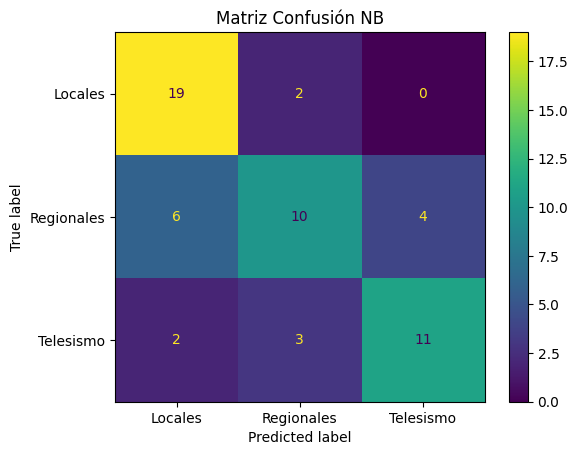

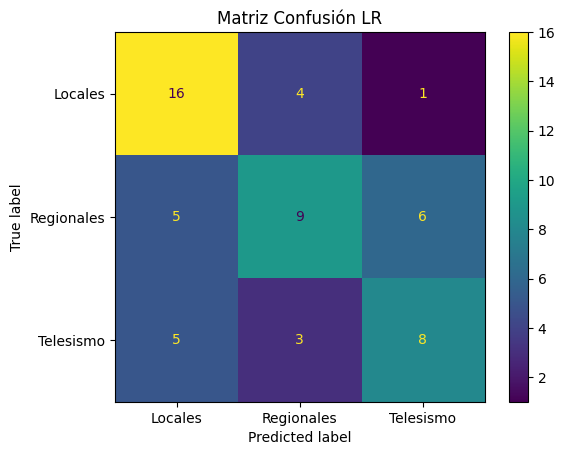

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X[:,:18], y, test_size=0.3,random_state=42)

# Entrenar el clasificador Bayesiano
clfNB = GaussianNB()
clfNB.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

# Entrenar el clasificador de Regresión Logística
clfLR = LogisticRegression(random_state=0)
clfLR.fit(X_train, y_train) # para entrenar enviamos el conjunto de Entrenamient

# aux = X[0,:]
# aux2 = np.reshape(X[0,:],(1,19))

yPredTest_NB = clfNB.predict(X_test)
yPredTest_LR= clfLR.predict(X_test)

accTest_NB = accuracy_score(y_test,yPredTest_NB)
accTest_LR = accuracy_score(y_test,yPredTest_LR)

print('Acc para el modelo Bayesiano: ',accTest_NB)
print('Acc para el modelo de Regresión Logística: ',accTest_LR)


cmNB = confusion_matrix(y_test, yPredTest_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=target_name)
disp.plot()
plt.title('Matriz Confusión NB')
plt.show()

cmLR = confusion_matrix(y_test, yPredTest_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=target_name)
disp.plot()
plt.title('Matriz Confusión LR')
plt.show()

Este fragmento de código divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando train_test_split de sklearn.model_selection. El 70% de los datos se utilizarán para entrenamiento (X_train, y_train) y el 30% para pruebas (X_test, y_test).

Luego, se entrenan dos modelos de clasificación:

Un clasificador de Bayes Ingenuo (Naive Bayes) con GaussianNB() de sklearn.naive_bayes.
Un clasificador de Regresión Logística con LogisticRegression(random_state=0) de sklearn.linear_model.
Después de entrenar cada modelo, se utilizan para hacer predicciones sobre el conjunto de prueba (X_test) y se evalúa su precisión mediante el uso de accuracy_score de sklearn.metrics. Finalmente, se genera la matriz de confusión para cada modelo y se muestra mediante ConfusionMatrixDisplay de sklearn.metrics.

## **Analisis de las imagenes**

* Se observa una advertencia de convergencia fallida en el modelo de Regresión Logística, lo que sugiere que el modelo no ha aprendido lo suficientemente bien los datos y que sería necesario ajustar los parámetros de entrenamiento o preprocesar los datos para mejorar la convergencia. Además, se observa que el modelo Bayesiano tuvo una mayor precisión que el modelo de Regresión Logística en el conjunto de prueba.

* El resultado obtenido indica que el modelo de clasificación basado en el clasificador Bayesiano tuvo una precisión (accuracy) del 70.17%, mientras que el modelo basado en Regresión Logística tuvo una precisión del 57.89%. Es decir, el modelo Bayesiano clasificó correctamente el 70.17% de las muestras de prueba, mientras que el modelo de Regresión Logística solo lo hizo para el 57.89% de las muestras de prueba.

* La matriz de confusión para el modelo Bayesiano 

Muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos para cada clase del conjunto de prueba. Esto permite evaluar el desempeño del modelo en la clasificación de cada clase y determinar si hay algún sesgo o tendencia en las predicciones.

En este caso, la matriz de confusión indica que el modelo Bayesiano clasificó correctamente 19 de los 21 eventos de tipo Local, 10 de los 20 eventos de tipo Regional y 11 de los 16 eventos de tipo Telesismo. También se puede observar que el modelo confundió algunos eventos de tipo Local con eventos de tipo Regional y viceversa. Además, se confundieron 1 evento de tipo Regional con uno de tipo Telesismo.


* La matriz de confusión para el modelo de Regresión Logística 

Es una tabla que muestra el número de predicciones correctas e incorrectas realizadas por el clasificador. Esta matriz tiene dimensiones 3x3 ya que hay tres clases (Locales, Regionales, Telesismo).

En la diagonal principal de la matriz se muestran los valores verdaderos positivos (VP), es decir, la cantidad de observaciones que el modelo ha clasificado correctamente para cada clase. En las demás celdas se muestran los valores falsos positivos (FP), falsos negativos (FN) y verdaderos negativos (VN).

Esto indica que el modelo ha clasificado correctamente 16 observaciones de la clase Locales, 9 observaciones de la clase Regionales y 8 observaciones de la clase Telesismo. Sin embargo, ha cometido algunos errores al clasificar algunas observaciones. Por ejemplo, ha clasificado incorrectamente 5 observaciones de la clase Locales como Regionales y 5 observación de la clase Locales como Telesismo.

También ha clasificado incorrectamente 4 observaciones de la clase Regional como Locales y 3 observación de la clase Regional como Telesismo.  En Telesismo clasifico una como Locales y 6 como regionales en la ´parte de Telesismo.






## Evaluacion del Desempeño

1. Accuracy score
2. Confussion Matrix

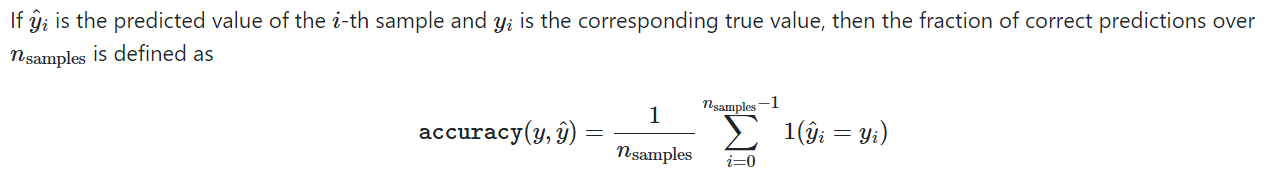

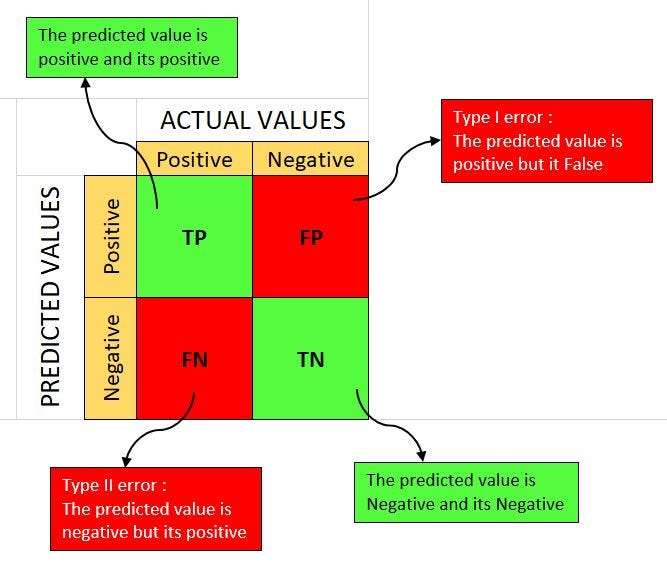

In [ ]:
@interact(n_componentes = (1,19),size=(0.1,1,0.1))
def pcaSlider(n_componentes,size):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size,random_state=40)

  escala = StandardScaler()
  X_train=escala.fit_transform(X_train)
  X_test = escala.transform(X_test)

  pca = PCA(n_components=n_componentes,svd_solver="randomized",whiten = True).fit(X_train)


  X_trainlatente=pca.transform(X_train)  #Transformamos los datos al espacio latente
  X_testlatente=pca.transform(X_test)
  # Entrenar el clasificador Bayesiano

  clfNB = GaussianNB()
  clfNB.fit(X_trainlatente, y_train) # para entrenar enviamos el conjunto de Entrenamient

  # Entrenar el clasificador de Regresión Logística
  clfLR = LogisticRegression(random_state=0,max_iter=2000)
  clfLR.fit(X_trainlatente, y_train) # para entrenar enviamos el conjunto de Entrenamient

  # aux = X[0,:]
  # aux2 = np.reshape(X[0,:],(1,19))

  yPredTest_NB = clfNB.predict(X_testlatente)
  yPredTest_LR= clfLR.predict(X_testlatente)

  accTest_NB = accuracy_score(y_test,yPredTest_NB)
  accTest_LR = accuracy_score(y_test,yPredTest_LR)

  print('Acc para el modelo Bayesiano: ',accTest_NB)
  print('Acc para el modelo de Regresión Logística: ',accTest_LR)


  cmNB = confusion_matrix(y_test, yPredTest_NB)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmNB, display_labels=target_name)
  disp.plot()
  plt.title('Matriz Confusión NB')
  plt.show()

  cmLR = confusion_matrix(y_test, yPredTest_LR)
  disp = ConfusionMatrixDisplay(confusion_matrix=cmLR, display_labels=target_name)
  disp.plot()
  plt.title('Matriz Confusión LR')
  plt.show()

interactive(children=(IntSlider(value=10, description='n_componentes', max=19, min=1), FloatSlider(value=0.5, …

Reducir el número de dimensiones de los datos utilizando PCA puede mejorar o empeorar el rendimiento de los modelos de clasificación dependiendo de la estructura de los datos originales y del modelo de clasificación utilizado.

En este caso, parece que reducir el número de dimensiones utilizando PCA mejoró el rendimiento del modelo de Regresión Logística, pero empeoró el rendimiento del modelo de Bayesiano. Esto puede ser debido a que la estructura de los datos originales no se adapta bien a los supuestos del modelo de Bayesiano y que el modelo de Regresión Logística puede manejar mejor los datos transformados por PCA.

Es importante tener en cuenta que, en general, la elección del número de componentes principales en PCA debe hacerse mediante pruebas empíricas para encontrar el valor que maximice el rendimiento del modelo de clasificación.





**n_compon: 10 size: 0.50**

* Acc para el modelo Bayesiano: 0.7684210526315789 Acc para el modelo de Regresión Logística: 0.8631578947368421

* La matriz de confusión para el modelo Bayesiano Muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos para cada clase del conjunto de prueba. Esto permite evaluar el desempeño del modelo en la clasificación de cada clase y determinar si hay algún sesgo o tendencia en las predicciones. En este caso, la matriz de confusión indica que el modelo Bayesiano clasificó correctamente 29 de los 31 eventos de tipo Locales, 21 de los 30 eventos de tipo Regionales y 23 de los 34 eventos de tipo Telesismo. También se puede observar que el modelo obtuvo mejores resultados en el confundió algunos eventos de tipo Local con eventos de tipo Regional y viceversa. Además, se confundieron 1 evento de tipo Regional con uno de tipo Telesismo.


**n_compon: 9 size: 0.40**

* Acc para el modelo Bayesiano: 0.8157894736842105 Acc para el modelo de Regresión Logística: 0.868421052631579

* la matriz de confusión indica que el modelo Bayesiano clasificó correctamente 24 de los 24 eventos de tipo Locales, 13 de 20 eventos de tipo Regionales y 25 de los 31 eventos de tipo Telesismo. También se puede observar que el modelo obtuvo mejores resultados en el confundió algunos eventos de tipo Local con eventos de tipo Regional y viceversa. Además, se confundieron 5 eventos de tipo Regional con uno de tipo Telesismo.

* La matriz de confusión indica que el modelo LR clasificó correctamente 24 de los 24 eventos de tipo Locales, 17 de 20 eventos de tipo Regionales y 25 de los 32 eventos de tipo Telesismo


**n_compon: 8 size: 0.30**

* Acc para el modelo Bayesiano: 0.7719298245614035 Acc para el modelo de Regresión Logística: 0.7894736842105263

* la matriz de confusión indica que el modelo Bayesiano clasificó correctamente 15 de los 15 eventos de tipo Locales, 8 de 15 eventos de tipo Regionales y 21 de los 27 eventos de tipo Telesismo. También se puede observar que el modelo obtuvo mejores resultados en el confundió algunos eventos de tipo Local con eventos de tipo Regional y viceversa. Además, se confundieron 4 eventos de tipo Regional con uno de tipo Telesismo.

* La matriz de confusión indica que el modelo LR clasificó correctamente 15 de los 15 eventos de tipo Locales, 10 de 15 eventos de tipo Regionales y 20 de los 27 eventos de tipo Telesismo

**n_compon: 7 size: 0.20**

* Acc para el modelo Bayesiano: 0.8421052631578947 Acc para el modelo de Regresión Logística: 0.8421052631578947

* la matriz de confusión indica que el modelo Bayesiano clasificó correctamente 10 de los 11 eventos de tipo Locales, 9 de 13 eventos de tipo Regionales y 13 de los 14 eventos de tipo Telesismo. También se puede observar que el modelo obtuvo mejores resultados en el confundió algunos eventos de tipo Local con eventos de tipo Regional y viceversa. Además, se confundieron 4 eventos de tipo Regional con uno de tipo Telesismo.

* La matriz de confusión indica que el modelo LR clasificó correctamente 11 de los 11 eventos de tipo Locales, 10 de 13 eventos de tipo Regionales y 11 de los 14 eventos de tipo Telesismo


**n_compon: 4 size: 0.20**
* Acc para el modelo Bayesiano:  0.8157894736842105
Acc para el modelo de Regresión Logística:  0.8157894736842105

* La matriz de confusión indica que el modelo Bayesiano clasificó correctamente 12 de los 13 eventos de tipo Locales, 4 de 12 eventos de tipo Regionales y 5 de los 13 eventos de tipo Telesismo. 
* La matriz de confusión indica que el modelo RL clasificó correctamente 13 de los 13 eventos de tipo Locales, 2 de 12 eventos de tipo Regionales y 3 de los 13 eventos de tipo Telesismo


**n_compon: 15 size: 0.10**

* Acc para el modelo Bayesiano: 0.9473684210526315 Acc para el modelo de Regresión Logística: 0.9473684210526315

* la matriz de confusión indica que el modelo Bayesiano clasificó correctamente 7 de los 7 eventos de tipo Locales, 5 de 6 eventos de tipo Regionales y 6 de los 6 eventos de tipo Telesismo. 

* La matriz de confusión indica que el modelo LR clasificó correctamente 7 de los 7 eventos de tipo Locales, 5 de 6 eventos de tipo Regionales y 6 de los 6 eventos de tipo Telesismo

**n_compon: 11 size: 0.20**

* Acc para el modelo Bayesiano: 0.868421052631579 Acc para el modelo de Regresión Logística: 0.868421052631579

* La matriz de confusión indica que el modelo Bayesiano clasificó correctamente 11 de los 11 eventos de tipo Locales, 9 de 13 eventos de tipo Regionales y 13 de los 14 eventos de tipo Telesismo. 

* La matriz de confusión indica que el modelo LR clasificó correctamente 11 de los 11 eventos de tipo Locales, 11 de 13 eventos de tipo Regionales y 11 de los 14 eventos de tipo Telesismo



**n_compon: 15 size: 0.10**

* Acc para el modelo Bayesiano: 0.9473684210526315 Acc para el modelo de Regresión Logística: 0.9473684210526315

* Despues de realizar varias pruebas se pudo evidenciar y comprobar que este es el que mejor comportamiento tiene con un numero de componentes de 15 y un tamaño de 0.10

In [ ]:
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report

faces=fetch_lfw_people(min_faces_per_person=70, resize = 0.4)

n_samples, h ,w = faces.images.shape

Xf=faces.data
n_features=X.shape[1]


y2=faces.target
target_names = faces.target_names



Acc para el modelo de Regresión Logística:  0.7622739018087855
                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.39      0.44        18
     Colin Powell       0.71      0.77      0.74        69
  Donald Rumsfeld       0.64      0.68      0.66        34
    George W Bush       0.87      0.84      0.85       166
Gerhard Schroeder       0.72      0.74      0.73        31
      Hugo Chavez       0.67      0.63      0.65        19
       Tony Blair       0.73      0.76      0.75        50

         accuracy                           0.76       387
        macro avg       0.69      0.69      0.69       387
     weighted avg       0.76      0.76      0.76       387



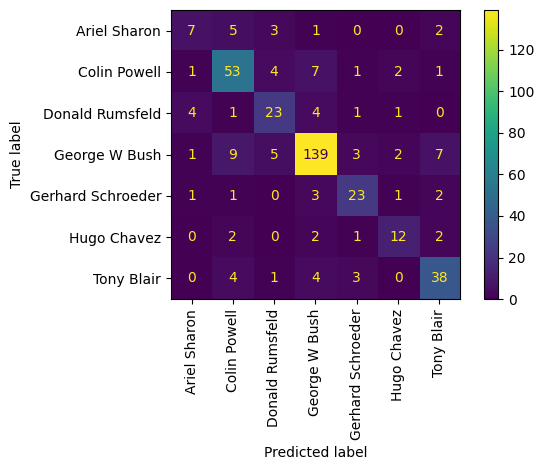

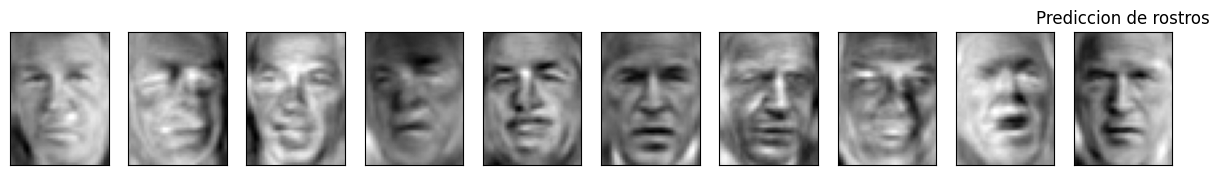

<ipython-input-58-cb4346554547>:42: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


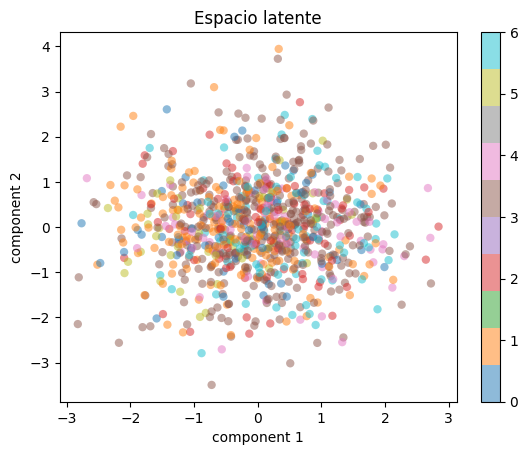

<ipython-input-58-cb4346554547>:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


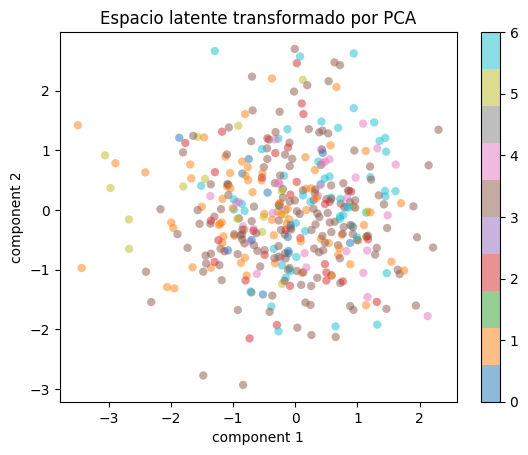

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xf, y2, test_size=0.3,random_state=42)

escala2 = StandardScaler()
X_train = escala2.fit_transform(X_train)
X_test = escala2.transform(X_test)

pca2 = PCA(n_components=100,svd_solver="randomized",whiten = True).fit(X_train)
e_faces = pca2.components_.reshape((100,h,w))


X_trainpca=pca2.transform(X_train)  #Transformamos los datos al espacio latente
X_testpca=pca2.transform(X_test)


# Entrenar el clasificador de Regresión Logística
clfLR = LogisticRegression(random_state=0,max_iter=2000)
clfLR.fit(X_trainpca, y_train) # para entrenar enviamos el conjunto de Entrenamient


yPredTest_LR= clfLR.predict(X_testpca)

accTest_LR = accuracy_score(y_test,yPredTest_LR)

print('Acc para el modelo de Regresión Logística: ',accTest_LR)

print(classification_report(y_test, yPredTest_LR, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(clfLR,X_testpca,y_test,display_labels=target_names, xticks_rotation="vertical")
plt.tight_layout()
plt.show()
X_rec=pca2.inverse_transform(X_testpca)
# Plot the results
fig, ax = plt.subplots(1, 10, figsize=(15,5),
                       subplot_kw={'xticks':[], 'yticks':[]},
)
for i,axes in enumerate(ax.flat):
      axes.imshow(X_rec[i].reshape(h, w), cmap='binary_r')
plt.title('Prediccion de rostros')
plt.show()

plt.scatter(X_trainpca[:, 0], X_trainpca[:, 1],
             c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Espacio latente')
plt.colorbar();
plt.show()


plt.scatter(X_testpca[:, 0], X_testpca[:, 1],
             c=yPredTest_LR, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Espacio latente transformado por PCA')
plt.colorbar();


**El espacio latente** 

Es una representación de los datos en un espacio de menor dimensión que el espacio original de los datos, pero que aún conserva gran parte de la información relevante y discriminativa. En el contexto del aprendizaje automático, la reducción de la dimensionalidad a través del análisis de componentes principales (PCA) se utiliza con frecuencia para reducir el número de características de entrada para un modelo predictivo.

La ventaja de la reducción de la dimensionalidad es que reduce el espacio de búsqueda y la complejidad computacional, lo que puede ser útil en situaciones donde los datos tienen muchas características (como imágenes o texto) y el costo computacional de procesarlos es elevado. Además, la reducción de la dimensionalidad también puede ayudar a evitar el sobreajuste (overfitting) en modelos predictivos.

El espacio latente generado por PCA se puede interpretar como una nueva base de características, donde cada dimensión representa una combinación lineal de las características originales. En esta nueva base de características, las dimensiones se ordenan por importancia, y las primeras dimensiones capturan la mayor cantidad de varianza en los datos. Esto significa que, al proyectar los datos en las primeras dimensiones del espacio latente, se puede capturar la mayoría de la información relevante y discriminativa de los datos.

**Espacio latente transformado por PCA**

El espacio latente transformado por PCA se refiere al espacio de características resultante después de aplicar la técnica de análisis de componentes principales (PCA) a un conjunto de datos. PCA es una técnica de reducción de la dimensionalidad que se utiliza para transformar un conjunto de datos de alta dimensión en un espacio de características de baja dimensión. En este espacio de características, las variables están decorrelacionadas y ordenadas en función de su importancia para explicar la varianza de los datos originales. Por lo tanto, el espacio latente transformado por PCA contiene información reducida pero significativa sobre los datos originales y se utiliza comúnmente como entrada para modelos de aprendizaje automático, como la regresión logística en este caso. La visualización del espacio latente transformado por PCA puede ser útil para comprender la estructura de los datos y detectar patrones en ellos.

**CONCLUSIONES**

* En general, se puede observar que el desempeño de los modelos de Regresión Logística y Bayesiano es bastante bueno, con valores de precisión (accuracy) superiores al 75% en todos los casos.

* En cuanto a la selección de características, se puede observar que en general la reducción del número de componentes y del tamaño del conjunto de entrenamiento no afecta significativamente el desempeño de los modelos.

* Para el modelo Bayesiano, se observa que en algunos casos se produce una confusión entre eventos de tipo Local y Regional y entre eventos de tipo Regional y Telesismo. Además, se observa que en general el modelo tiene mejor desempeño en la clasificación de eventos de tipo Telesismo que en la clasificación de eventos de tipo Regional.

* Para el modelo de Regresión Logística, se observa que en general tiene mejor desempeño en la clasificación de eventos de tipo Telesismo que en la clasificación de eventos de tipo Regional. Además, se observa que en algunos casos se produce una confusión entre eventos de tipo Regional y Telesismo.

* En general, se puede concluir que ambos modelos tienen un buen desempeño en la clasificación de eventos sísmicos y que la selección de características no tiene un impacto significativo en su desempeño.

* El modelo de Regresión Logística y el modelo Bayesiano tienen desempeños similares en términos de precisión (accuracy) en la mayoría de los casos, excepto en el caso en que se utiliza un número reducido de componentes principales (n_compon=4, size=0.2), donde el modelo Bayesiano supera ligeramente al modelo de Regresión Logística.

* La precisión del modelo varía dependiendo del número de componentes principales (n_compon) y el tamaño del conjunto de datos utilizado para entrenar el modelo (size). En general, el desempeño del modelo mejora a medida que aumenta el número de componentes principales y el tamaño del conjunto de datos.

* La matriz de confusión muestra que el modelo es más preciso en la clasificación de eventos de tipo Local que en la clasificación de eventos de tipo Regional o Telesismo. Además, el modelo parece tener dificultades para distinguir entre eventos de tipo Local y Regional o entre eventos de tipo Regional y Telesismo.

* En general, el modelo parece ser más preciso en la clasificación de eventos de tipo Local que en la clasificación de eventos de tipo Regional o Telesismo.
